<a href="https://colab.research.google.com/github/Fatimakhanim/Deep-Learning-Projects/blob/main/training_deep_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vanishing/ Exploding Gradients Problem

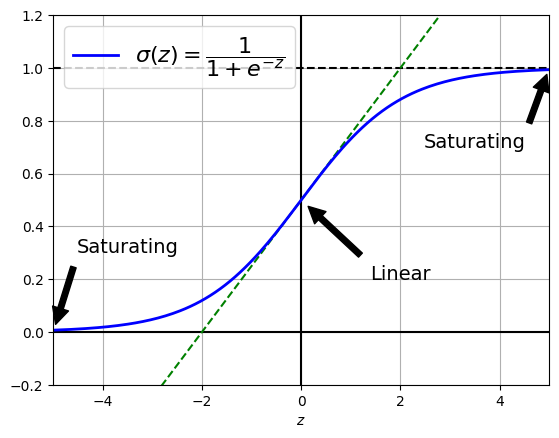

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def sigmoid(z):
  return 1 / (1+np.exp(-z))

z = np.linspace(-5,5,200)


plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-0.2, 1.2], 'k-')
plt.plot([-5, 5], [-3/4, 7/4], 'g--')
plt.plot(z, sigmoid(z), "b-", linewidth=2,
         label=r"$\sigma(z) = \dfrac{1}{1+e^{-z}}$")
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Saturating', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props,
             fontsize=14, ha="center")
plt.annotate('Saturating', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props,
             fontsize=14, ha="center")
plt.annotate('Linear', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props,
             fontsize=14, ha="center")
plt.grid(True)
plt.axis([-5, 5, -0.2, 1.2])
plt.xlabel("$z$")
plt.legend(loc="upper left", fontsize=16)


plt.show()



In [2]:
import tensorflow as tf
dense = tf.keras.layers.Dense(50,activation = "relu",
                              kernel_initializer = "he_normal")



In [3]:
he_avg_init = tf.keras.initializers.VarianceScaling(scale = 2,mode = "fan_avg",
                                                    distribution = "uniform")
dense = tf.keras.layers.Dense(50, activation = "sigmoid",
                              kernel_initializer = he_avg_init)

#Nonsaturating Activation Functions

Leaky ReLU


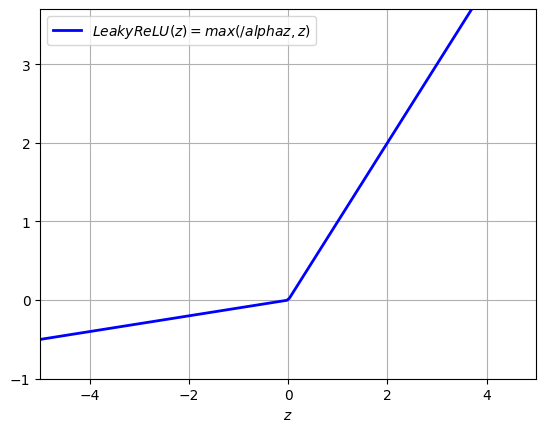

In [4]:

def leaky_relu(z,alpha):
  return np.maximum(alpha*z,z)

z = np.linspace(-5,5,200)

plt.plot(z, leaky_relu(z,0.1),"b-", linewidth = 2, label = r"$LeakyReLU(z) = max(/alpha z,z)$")
plt.grid(True)
plt.xlabel("$z$")
plt.axis([-5,5,-1,3.7])
plt.legend()
plt.show()

In [5]:
leaky_relu = tf.keras.layers.LeakyReLU(alpha = 0.2)
dense = tf.keras.layers.Dense(50, activation = leaky_relu,
                              kernel_initializer = "he_normal")

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(50, kernel_initializer = "he_normal"),
    tf.keras.layers.LeakyReLU(alpha = 0.2)
])

#ELU

In [7]:
dense = tf.keras.layers.Dense(50,activation = "elu",
                              kernel_initializer = "he_normal")

In [8]:
dense = tf.keras.layers.Dense(50, activation = "selu",
                              kernel_initializer = "lecun_normal")

In [9]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = [28,28]))
for layer in range(100):
  model.add(tf.keras.layers.Dense(100,activation = "selu",
                                  kernel_initializer = "lecun_normal"))
model.add(tf.keras.layers.Dense(10,activation = "softmax"))

In [10]:
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = tf.keras.optimizers.SGD(learning_rate = 0.0001),
              metrics = ["accuracy"])

In [11]:
fashion_mnist= tf.keras.datasets.fashion_mnist.load_data()
(X_train_full,y_train_full),(X_test,y_test) = fashion_mnist

X_train,y_train = X_train_full[:-5000],y_train_full[:-5000]
X_valid,y_valid = X_train_full[-5000:],y_train_full[-5000:]
X_train,X_valid,X_test = X_train /255, X_valid /255 , X_test/255

4422102/4422102 [==============================] - 1s 0us/step


In [12]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [13]:
pixel_means = X_train.mean(axis = 0,keepdims = True)
pixel_stds = X_train.std(axis = 0,keepdims = True)
X_train_scaled = (X_train - pixel_means)/ pixel_stds
X_valid_scaled = (X_valid-pixel_means)/pixel_stds
X_test_scaled = (X_test - pixel_means)/ pixel_stds

In [14]:
history = model.fit(X_train_scaled,y_train, epochs = 5,
                    validation_data = (X_valid_scaled,y_valid))

Epoch 1/5
1719/1719 [==============================] - 65s 28ms/step - loss: 1.3236 - accuracy: 0.5233 - val_loss: 0.8969 - val_accuracy: 0.6842
Epoch 2/5
1719/1719 [==============================] - 47s 27ms/step - loss: 0.8363 - accuracy: 0.7023 - val_loss: 0.7312 - val_accuracy: 0.7488
Epoch 3/5
1719/1719 [==============================] - 47s 27ms/step - loss: 0.7171 - accuracy: 0.7457 - val_loss: 0.6627 - val_accuracy: 0.7692
Epoch 4/5
1719/1719 [==============================] - 47s 27ms/step - loss: 0.6523 - accuracy: 0.7685 - val_loss: 0.6130 - val_accuracy: 0.7884
Epoch 5/5
1719/1719 [==============================] - 46s 27ms/step - loss: 0.6127 - accuracy: 0.7825 - val_loss: 0.5920 - val_accuracy: 0.7900


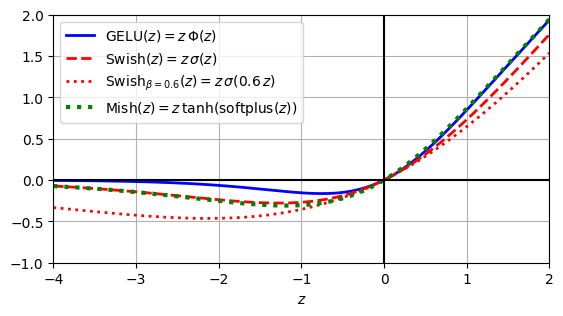

In [15]:
def swish(z,beta = 1):
  return z * sigmoid(beta*z)

def approx_gelu(z):
  return swish(z,beta = 1.702)

def softplus(z):
  return np.log(1+np.exp(z))

def mish(z):
  return z* np.tanh(softplus(z))


z = np.linspace(-4, 2, 200)

beta = 0.6
plt.plot(z, approx_gelu(z), "b-", linewidth=2,
         label=r"GELU$(z) = z\,\Phi(z)$")
plt.plot(z, swish(z), "r--", linewidth=2,
         label=r"Swish$(z) = z\,\sigma(z)$")
plt.plot(z, swish(z, beta), "r:", linewidth=2,
         label=fr"Swish$_{{\beta={beta}}}(z)=z\,\sigma({beta}\,z)$")
plt.plot(z, mish(z), "g:", linewidth=3,
         label=fr"Mish$(z) = z\,\tanh($softplus$(z))$")
plt.plot([-4, 2], [0, 0], 'k-')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.axis([-4, 2, -1, 2])
plt.gca().set_aspect("equal")
plt.xlabel("$z$")
plt.legend(loc="upper left")

plt.show()

#Batch Normalization

In [16]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [17]:
model= tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = [28,28]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(300, activation = "relu",
                          kernel_initializer = "he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100, activation = "relu",
                          kernel_initializer = "he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation = "softmax")
])

In [18]:
[(var.name,var.trainable) for var in model.layers[1].variables]

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

In [19]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "sgd", metrics = "accuracy")

In [20]:
history = model.fit(X_train,y_train, epochs = 10,
                    validation_data = (X_valid,y_valid))

Epoch 1/10
1719/1719 [==============================] - 12s 5ms/step - loss: 0.5524 - accuracy: 0.8091 - val_loss: 0.3983 - val_accuracy: 0.8568
Epoch 2/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4043 - accuracy: 0.8551 - val_loss: 0.3624 - val_accuracy: 0.8678
Epoch 3/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3630 - accuracy: 0.8712 - val_loss: 0.3432 - val_accuracy: 0.8774
Epoch 4/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3369 - accuracy: 0.8793 - val_loss: 0.3354 - val_accuracy: 0.8758
Epoch 5/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3177 - accuracy: 0.8841 - val_loss: 0.3277 - val_accuracy: 0.8784
Epoch 6/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2978 - accuracy: 0.8921 - val_loss: 0.3277 - val_accuracy: 0.8810
Epoch 7/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2838 - accuracy: 0.8967 - val_loss: 0.3250 - val_accuracy

In [21]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3335 - accuracy: 0.8831


[0.3334827125072479, 0.8830999732017517]

In [22]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [23]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(300,kernel_initializer = "he_normal",use_bias = False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.Dense(100,kernel_initializer = "he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Activation("softmax")
]
)

In [24]:
model.compile(loss = "sparse_categorical_crossentropy",optimizer = "sgd",metrics = "accuracy")
history = model.fit(X_train,y_train,epochs = 5,
                    validation_data = (X_valid,y_valid))

Epoch 1/5
1719/1719 [==============================] - 10s 5ms/step - loss: 0.6178 - accuracy: 0.7917 - val_loss: 0.4404 - val_accuracy: 0.8422
Epoch 2/5
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4330 - accuracy: 0.8476 - val_loss: 0.3784 - val_accuracy: 0.8632
Epoch 3/5
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3870 - accuracy: 0.8638 - val_loss: 0.3555 - val_accuracy: 0.8704
Epoch 4/5
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3564 - accuracy: 0.8733 - val_loss: 0.3473 - val_accuracy: 0.8764
Epoch 5/5
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3344 - accuracy: 0.8812 - val_loss: 0.3410 - val_accuracy: 0.8714


In [ ]:
model.evaluate(X_test,y_test)

#Gradient Clipping

In [ ]:
optimizer = tf.keras.optimizers.SGD(clipvalue=1.0)
model.compile(loss = "sparse_categorical_crossentropy", optimizer = optimizer,metrics = ["accuracy"])

In [ ]:
optimizer = tf.keras.optimizers.SGD(clipnorm=1.0)
model.compile(loss = "sparse_categorical_crossentropy", optimizer = optimizer,metrics = ["accuracy"])

# Reusing Pretrained Layers

In [ ]:
pos_class_id = class_names.index("Pullover")
neg_class_id = class_names.index("T-shirt/top")

def split_dataset(X, y):
    y_for_B = (y == pos_class_id) | (y == neg_class_id)
    y_A = y[~y_for_B]
    y_B = (y[y_for_B] == pos_class_id).astype(np.float32)
    old_class_ids = list(set(range(10)) - set([neg_class_id, pos_class_id]))
    for old_class_id, new_class_id in zip(old_class_ids, range(8)):
        y_A[y_A == old_class_id] = new_class_id  # reorder class ids for A
    return ((X[~y_for_B], y_A), (X[y_for_B], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

tf.random.set_seed(42)

model_A = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(100, activation = "relu",kernel_initializer ="he_normal"),
    tf.keras.layers.Dense(100, activation = "relu",kernel_initializer ="he_normal"),
    tf.keras.layers.Dense(100, activation = "relu",kernel_initializer ="he_normal"),
    tf.keras.layers.Dense(8, activation = "softmax")
])

In [29]:
model_A.compile(loss = "sparse_categorical_crossentropy",optimizer = tf.keras.optimizers.SGD(learning_rate = 1e-3),metrics = ["accuracy"])

In [30]:
history = model_A.fit(X_train_A,y_train_A,epochs = 20,
                      validation_data = (X_valid_A,y_valid_A))

Epoch 1/20
1376/1376 [==============================] - 6s 4ms/step - loss: 1.1297 - accuracy: 0.6545 - val_loss: 0.6999 - val_accuracy: 0.7681
Epoch 2/20
1376/1376 [==============================] - 5s 4ms/step - loss: 0.6041 - accuracy: 0.8033 - val_loss: 0.5226 - val_accuracy: 0.8265
Epoch 3/20
1376/1376 [==============================] - 5s 3ms/step - loss: 0.4860 - accuracy: 0.8445 - val_loss: 0.4460 - val_accuracy: 0.8559
Epoch 4/20
1376/1376 [==============================] - 5s 4ms/step - loss: 0.4251 - accuracy: 0.8623 - val_loss: 0.4015 - val_accuracy: 0.8669
Epoch 5/20
1376/1376 [==============================] - 5s 3ms/step - loss: 0.3876 - accuracy: 0.8714 - val_loss: 0.3748 - val_accuracy: 0.8724
Epoch 6/20
1376/1376 [==============================] - 5s 3ms/step - loss: 0.3621 - accuracy: 0.8781 - val_loss: 0.3546 - val_accuracy: 0.8789
Epoch 7/20
1376/1376 [==============================] - 6s 4ms/step - loss: 0.3440 - accuracy: 0.8821 - val_loss: 0.3391 - val_accuracy:

In [ ]:
model_A.save("my_model_A")

In [ ]:
model.evaluate(X_test_A,y_test_A)

In [ ]:
tf.random.set_seed(42)
model_B = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = [28,28]),
    tf.keras.layers.Dense(100,activation = "relu",
                          kernel_initializer = "he_normal"),
    tf.keras.layers.Dense(100,activation = "relu",
                          kernel_initializer = "he_normal"),
    tf.keras.layers.Dense(100,activation = "relu",
                          kernel_initializer = "he_normal"),
    tf.keras.layers.Dense(1,activation = "sigmoid"),

])

In [ ]:
model_B.compile(loss = "binary_crossentropy",optimizer = tf.keras.optimizers.SGD(learning_rate = 1e-3),metrics = ["accuracy"])

In [ ]:
history = model_B.fit(X_train_B,y_train_B,epochs = 20,
                      validation_data = (X_valid_B,y_valid_B))

In [ ]:
model_A = tf.keras.models.load_model("my_model_A")
model_B_on_A = tf.keras.Sequential(model_A.layers[:-1])
model_B_on_A.add(tf.keras.layers.Dense(1,activation = "sigmoid"))

In [37]:
model_A_clone = tf.keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())


In [38]:
model_B_on_A = tf.keras.Sequential(model_A_clone.layers[:-1])
model_B_on_A.add(tf.keras.layers.Dense(1,activation="sigmoid"))

In [39]:
for layer in model_B_on_A.layers[:-1]:
  layer.trainable = False

model_B_on_A.compile(loss = "binary_crossentropy", optimizer = tf.keras.optimizers.SGD(learning_rate = 1e-3),
                     metrics = ["accuracy"])

In [40]:
history = model_B_on_A.fit(X_train_B,y_train_B, epochs = 4,
                           validation_data = (X_valid_B,y_valid_B))

for layer in model_B_on_A.layers[:-1]:
  layer.trainable = True

model_B_on_A.compile(loss = "binary_crossentropy",
                     optimizer = tf.keras.optimizers.SGD(learning_rate = 1e-3),
                     metrics = ["accuracy"])
history = model_B_on_A.fit(X_train_B , y_train_B ,epochs = 16,
                           validation_data = (X_valid_B, y_valid_B))

Epoch 1/4
7/7 [==============================] - 1s 40ms/step - loss: 0.9489 - accuracy: 0.4350 - val_loss: 0.9087 - val_accuracy: 0.3600
Epoch 2/4
7/7 [==============================] - 0s 16ms/step - loss: 0.8813 - accuracy: 0.3550 - val_loss: 0.8804 - val_accuracy: 0.3323
Epoch 3/4
7/7 [==============================] - 0s 18ms/step - loss: 0.8567 - accuracy: 0.3500 - val_loss: 0.8707 - val_accuracy: 0.3363
Epoch 4/4
7/7 [==============================] - 0s 19ms/step - loss: 0.8278 - accuracy: 0.3700 - val_loss: 0.8479 - val_accuracy: 0.3482
Epoch 1/16
7/7 [==============================] - 1s 66ms/step - loss: 0.7836 - accuracy: 0.4250 - val_loss: 0.7552 - val_accuracy: 0.4738
Epoch 2/16
7/7 [==============================] - 0s 34ms/step - loss: 0.7027 - accuracy: 0.5300 - val_loss: 0.6837 - val_accuracy: 0.5500
Epoch 3/16
7/7 [==============================] - 0s 35ms/step - loss: 0.6381 - accuracy: 0.6200 - val_loss: 0.6419 - val_accuracy: 0.6370
Epoch 4/16
7/7 [===============

In [ ]:
def build_model(seed = 42):
  tf.random.set_seed(seed)
  return tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape = [28,28]),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Dense(100, activation = "relu",kernel_initializer = "he_normal"),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Dense(100, activation = "relu",kernel_initializer = "he_normal"),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Dense(100, activation = "relu",kernel_initializer = "he_normal"),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Dense(10, activation = "softmax"),
  ])

def build_and_train_model(optimizer):
  model = build_model()
  model.compile(loss = "sparse_categorical_crossentropy",optimizer = optimizer,
                metrics = ["accuracy"])
  return model.fit(X_train,y_train,epochs = 10,
                   validation_data = (X_valid,y_valid))

#Momentun optimization

In [42]:
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001, momentum = 0.9)

In [43]:
history_sgd = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 [==============================] - 13s 7ms/step - loss: 0.6115 - accuracy: 0.7882 - val_loss: 0.4200 - val_accuracy: 0.8478
Epoch 2/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4408 - accuracy: 0.8431 - val_loss: 0.3700 - val_accuracy: 0.8652
Epoch 3/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3977 - accuracy: 0.8570 - val_loss: 0.3448 - val_accuracy: 0.8740
Epoch 4/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3719 - accuracy: 0.8667 - val_loss: 0.3367 - val_accuracy: 0.8776
Epoch 5/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3541 - accuracy: 0.8720 - val_loss: 0.3299 - val_accuracy: 0.8790
Epoch 6/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3359 - accuracy: 0.8792 - val_loss: 0.3340 - val_accuracy: 0.8798
Epoch 7/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3216 - accuracy: 0.8825 - val_loss: 0.3248 - val_ac

# Nestrov Accelerated Gradient

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001, momentum = 0.9,
                                    nesterov = True)

In [45]:
history_nesterov = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 [==============================] - 13s 6ms/step - loss: 0.6155 - accuracy: 0.7868 - val_loss: 0.4232 - val_accuracy: 0.8406
Epoch 2/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4418 - accuracy: 0.8425 - val_loss: 0.3754 - val_accuracy: 0.8604
Epoch 3/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4004 - accuracy: 0.8563 - val_loss: 0.3502 - val_accuracy: 0.8704
Epoch 4/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3709 - accuracy: 0.8670 - val_loss: 0.3453 - val_accuracy: 0.8750
Epoch 5/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3517 - accuracy: 0.8713 - val_loss: 0.3343 - val_accuracy: 0.8774
Epoch 6/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3362 - accuracy: 0.8792 - val_loss: 0.3316 - val_accuracy: 0.8796
Epoch 7/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3238 - accuracy: 0.8828 - val_loss: 0.3264 - val_ac

#AdaGrad

In [46]:
optimizer = tf.keras.optimizers.Adagrad(learning_rate = 0.001)

In [47]:
history_adagrad = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 [==============================] - 13s 6ms/step - loss: 0.8629 - accuracy: 0.7126 - val_loss: 0.5880 - val_accuracy: 0.7972
Epoch 2/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.6293 - accuracy: 0.7821 - val_loss: 0.5193 - val_accuracy: 0.8194
Epoch 3/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.5743 - accuracy: 0.8029 - val_loss: 0.4845 - val_accuracy: 0.8300
Epoch 4/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.5426 - accuracy: 0.8103 - val_loss: 0.4668 - val_accuracy: 0.8374
Epoch 5/10
1719/1719 [==============================] - 11s 7ms/step - loss: 0.5243 - accuracy: 0.8162 - val_loss: 0.4526 - val_accuracy: 0.8404
Epoch 6/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.5064 - accuracy: 0.8237 - val_loss: 0.4420 - val_accuracy: 0.8450
Epoch 7/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4938 - accuracy: 0.8274 - val_loss: 0.4323 - val_ac

#RMSProp

In [ ]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.001, rho = 0.9)

In [ ]:
history_rmsprop = build_and_train_model(optimizer)

# Adam Optimization

In [50]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001,beta_1 = 0.9,
                                     beta_2 = 0.999)

In [51]:
history_adam = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 [==============================] - 14s 7ms/step - loss: 0.5019 - accuracy: 0.8200 - val_loss: 0.3757 - val_accuracy: 0.8598
Epoch 2/10
1719/1719 [==============================] - 11s 7ms/step - loss: 0.3821 - accuracy: 0.8597 - val_loss: 0.3625 - val_accuracy: 0.8638
Epoch 3/10
1719/1719 [==============================] - 11s 7ms/step - loss: 0.3504 - accuracy: 0.8729 - val_loss: 0.3495 - val_accuracy: 0.8760
Epoch 4/10
1719/1719 [==============================] - 11s 7ms/step - loss: 0.3264 - accuracy: 0.8795 - val_loss: 0.3123 - val_accuracy: 0.8816
Epoch 5/10
1719/1719 [==============================] - 11s 7ms/step - loss: 0.3060 - accuracy: 0.8859 - val_loss: 0.3100 - val_accuracy: 0.8842
Epoch 6/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2910 - accuracy: 0.8909 - val_loss: 0.3142 - val_accuracy: 0.8836
Epoch 7/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2758 - accuracy: 0.8968 - val_loss: 0.3118 - val_ac

#Exponential Scheduling

#learning_rate = initial_learning_rate * decay_rate **(step/decay_steps)

In [52]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps = 20_000,
    decay_rate =0.1,
    staircase = False
)
optimizer = tf.keras.optimizers.SGD(learning_rate = lr_schedule)

In [53]:

history_exponential_scheduling = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 [==============================] - 13s 7ms/step - loss: 0.6136 - accuracy: 0.7862 - val_loss: 0.4185 - val_accuracy: 0.8462
Epoch 2/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4495 - accuracy: 0.8396 - val_loss: 0.3769 - val_accuracy: 0.8608
Epoch 3/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4089 - accuracy: 0.8552 - val_loss: 0.3562 - val_accuracy: 0.8698
Epoch 4/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3851 - accuracy: 0.8617 - val_loss: 0.3496 - val_accuracy: 0.8702
Epoch 5/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3719 - accuracy: 0.8653 - val_loss: 0.3433 - val_accuracy: 0.8726
Epoch 6/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3565 - accuracy: 0.8718 - val_loss: 0.3425 - val_accuracy: 0.8756
Epoch 7/10
1719/1719 [==============================] - 11s 7ms/step - loss: 0.3488 - accuracy: 0.8748 - val_loss: 0.3400 - val_ac

In [ ]:
# extra code – this cell plots exponential scheduling

initial_learning_rate = 0.01
decay_rate = 0.1
decay_steps = 20_000

steps = np.arange(100_000)
lrs = initial_learning_rate * decay_rate ** (steps / decay_steps)
lrs2 = initial_learning_rate * decay_rate ** np.floor(steps / decay_steps)

plt.plot(steps, lrs,  "-", label="staircase=False")
plt.plot(steps, lrs2,  "-", label="staircase=True")
plt.axis([0, steps.max(), 0, 0.0105])
plt.xlabel("Step")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

#Piecewise Constant Scheduling

In [ ]:
lr_schedule = tf.keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries = [50_000,80_000],
    values = [0.01,0.005,0.001]

)
optimizer = tf.keras.optimizers.SGD(learning_rate = lr_schedule)
history_piecewise_scheduling = build_and_train_model(optimizer)

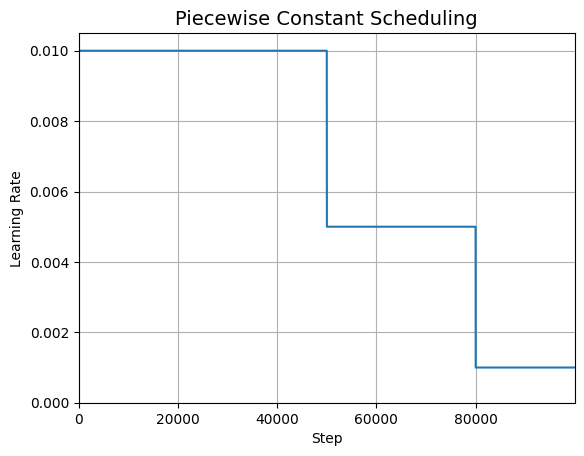

In [56]:
boundaries = [50_000, 80_000]
values = [0.01, 0.005, 0.001]

steps = np.arange(100_000)

lrs = np.full(len(steps), values[0])
for boundary, value in zip(boundaries, values[1:]):
    lrs[boundary:] = value

plt.plot(steps, lrs, "-")
plt.axis([0, steps.max(), 0, 0.0105])
plt.xlabel("Step")
plt.ylabel("Learning Rate")
plt.title("Piecewise Constant Scheduling", fontsize=14)
plt.grid(True)
plt.show()

#Avoiding Overfitting Through Regularization

In [ ]:

layer = tf.keras.layers.Dense(100, activation = "relu",
                              kernel_initializer ="he_normal",
                              kernel_regularizer = tf.keras.regularizers.l2(0.01))

In [ ]:
tf.random.set_seed(42)

In [59]:
from functools import partial

RegularizedDense = partial(tf.keras.layers.Dense,
                           activation = "relu",
                           kernel_initializer = "he_normal",
                           kernel_regularizer = tf.keras.regularizers.l2(0.01))

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = [28,28]),
    RegularizedDense(100),
    RegularizedDense(100),
    RegularizedDense (10,activation = "softmax")

])

In [60]:
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.02)
model.compile(loss = "sparse_categorical_crossentropy",optimizer = optimizer,metrics = ["accuracy"])
history = model.fit(X_train,y_train,epochs = 2,
                    validation_data = (X_valid,y_valid))

Epoch 1/2
1719/1719 [==============================] - 7s 3ms/step - loss: 3.1219 - accuracy: 0.7768 - val_loss: 1.8617 - val_accuracy: 0.8230
Epoch 2/2
1719/1719 [==============================] - 6s 4ms/step - loss: 1.4289 - accuracy: 0.8138 - val_loss: 1.1289 - val_accuracy: 0.8148


In [ ]:
tf.random.set_seed(42)

In [62]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = [28,28]),
    tf.keras.layers.Dropout(rate = 0.2),
    tf.keras.layers.Dense(100,activation = "relu",
                          kernel_initializer = "he_normal"),
    tf.keras.layers.Dropout(rate = 0.2),
    tf.keras.layers.Dense(100,activation = "relu",
                          kernel_initializer = "he_normal"),
    tf.keras.layers.Dense(10,activation = "softmax")
])

In [63]:
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01,momentum = 0.9)
model.compile(loss = "sparse_categorical_crossentropy",optimizer = optimizer, metrics = "accuracy")

history = model.fit(X_train,y_train,epochs = 10,
                    validation_data = (X_valid,y_valid))

Epoch 1/10
1719/1719 [==============================] - 7s 3ms/step - loss: 0.6316 - accuracy: 0.7686 - val_loss: 0.4309 - val_accuracy: 0.8352
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4839 - accuracy: 0.8207 - val_loss: 0.4059 - val_accuracy: 0.8352
Epoch 3/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4477 - accuracy: 0.8345 - val_loss: 0.3933 - val_accuracy: 0.8528
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4232 - accuracy: 0.8419 - val_loss: 0.3759 - val_accuracy: 0.8580
Epoch 5/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4105 - accuracy: 0.8465 - val_loss: 0.3670 - val_accuracy: 0.8572
Epoch 6/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4003 - accuracy: 0.8495 - val_loss: 0.3524 - val_accuracy: 0.8634
Epoch 7/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3880 - accuracy: 0.8550 - val_loss: 0.3539 - val_accuracy:

#MC Dropout

In [ ]:
tf.random.set_seed(42)

In [ ]:
y_probas = np.stack([model(X_test, training = True)
                     for sample in range(100)])
y_proba = y_probas.mean(axis = 0)

In [ ]:
model.predict(X_test[:1]).round(3)

In [ ]:
y_proba[0].round(3)

In [ ]:
y_std = y_probas.std(axis = 0)
y_std[0].round(3)

#Max Norm

In [73]:
dense = tf.keras.layers.Dense(
    100, activation = "relu" , kernel_initializer = "he_normal",
    kernel_constraint = tf.keras.constraints.max_norm(1.)
)
MaxNormDense = partial(tf.keras.layers.Dense,
                       activation = "relu",kernel_initializer = "he_normal",
                       kernel_constraint = tf.keras.constraints.max_norm(1.))

tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = [28,28]),
    MaxNormDense(100),
    MaxNormDense(100),
    tf.keras.layers.Dense(10,activation = "softmax")
])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01,momentum = 0.9)
model.compile(loss = "sparse_categorical_crossentropy", optimizer=optimizer,
              metrics = ["accuracy"])

history = model.fit(X_train,y_train,epochs = 10,
                    validation_data=(X_valid,y_valid))

Epoch 1/10
1719/1719 [==============================] - 10s 3ms/step - loss: 0.5499 - accuracy: 0.8031 - val_loss: 0.4393 - val_accuracy: 0.8356
Epoch 2/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4107 - accuracy: 0.8503 - val_loss: 0.4091 - val_accuracy: 0.8450
Epoch 3/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3751 - accuracy: 0.8613 - val_loss: 0.3918 - val_accuracy: 0.8606
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3564 - accuracy: 0.8695 - val_loss: 0.3576 - val_accuracy: 0.8684
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3441 - accuracy: 0.8731 - val_loss: 0.3470 - val_accuracy: 0.8734
Epoch 6/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3363 - accuracy: 0.8763 - val_loss: 0.3983 - val_accuracy: 0.8632
Epoch 7/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3271 - accuracy: 0.8770 - val_loss: 0.3722 - val_accuracy